# А. Практика. Написать программу для поиска ближайшей пары точек на плоскости методом сканирующей строки# 

In [105]:

#Класс точка
class pt:
    def __init__(self, id_, x, y):
        self.x = x
        self.y = y
        self.id = id_
#Сравнение по x
def cmp_x(a1, b1):
    if a1.x < b1.x or a1.x == b1.x and a1.y < b1.y:
        return 1
    else:
        return -1   
    
tmp =0
#Сравнение по y
def cmp_y(a1, b1):
    if a1.y < b1.y:
        return True
    else:
        return False


In [107]:
#Релаксация ответа
def upd_ans(a1, b1):
    global mindist
    global ansa
    global ansb
    global count_dist
    dist = np.sqrt((a1.x-b1.x)*(a1.x-b1.x) + (a1.y-b1.y)*(a1.y-b1.y) + .0);
    count_dist += 1
    if (dist < mindist):
        mindist = dist
        ansa = a1.id
        ansb = b1.id
        print(mindist, ansa, ansb)

#Сортировка слиянием 
def mergeSort(arr1):
    arr = arr1
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        L = mergeSort(L) # Sorting the first half 
        R = mergeSort(R) # Sorting the second half 
  
        i = 0
        j = 0
        k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if cmp_y(L[i], R[j]): 
                #print(arr[k].y)
                #print(L[i].y)
                arr[k] = L[i] 
                #print(arr[k].y)
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
    return arr

#функция для дебага вывода массива
def printa(a):
    print([el.id for el in a])

#Функция разделяй и властвуй для нахождения наименьшего расстояния
def rec(l, r) :
    if (r - l <= 3):
        for i in range(l , r+1 , 1):
            for j in range(i+1, r+1, 1):
                upd_ans(a[i], a[j])
        a[l:r+1].sort(cmp= cmp_y )
        return

    m = (l + r) >> 1
    
    midx = a[m].x
    rec(l, m)
    rec (m+1, r)
    
    a[l:r+1] = mergeSort(a[l:r+1])
    t = a[l:r+1]

    tsz = 0
    for i in range(l, r+1, 1):
        if (abs (a[i].x - midx) < mindist):
            j = tsz-1
            while j>=0 and a[i].y - t[j].y < mindist:
                upd_ans(a[i], t[j])
                j -= 1
            t[tsz] = a[i]
            tsz += 1



In [113]:
import numpy as np

#Кол-во вычислений расстояния
count_dist = 0

#Кол-во точек
MAXN = 10000;

#Инициализация
a = list()
for i in range(MAXN):
    a.append(pt(i, np.random.randint(low = -100, high=100), np.random.randint(low = -100, high=100)))
    
#ИНициализация ответа
mindist = .0
ansa = 0
ansb = 0

#Сортировка по x
a.sort(cmp=cmp_x )

mindist = 1E20

#Вызов рекурсии
rec(0, MAXN-1)   

#Печать ответа
print(count_dist)

(10.0, 5525, 8948)
(2.0, 8948, 3417)
(1.0, 414, 8169)
(0.0, 8169, 6912)
8672


#  Б. Теория. Тест пересечения отрезка и треугольника в 3D.

In [28]:
#orient3D which tests is a point (D) above or below the plane define by ABC
#Функция orient3D(A(x,y,z), B(x,y,z), C(x,y,z), d(x,y,z)) - показывает с какой стороны точка d расположена относительно плоскости задаваемой точками A, B и C. 
class Point(object):


    def __init__(self, x, y, z):

        self.X = x
        self.Y = y
        self.Z = z
        
        
class Matrix4x4(object):
 
    def __init__(self, A, B, C, D):
        self.a = A
        self.b = B
        self.c = C
        self.d = D
    
    def Determinate(self):
        return np.linalg.det([[self.a.X-self.d.X , self.a.Y-self.d.Y , self.a.Z-self.d.Z]
                              ,[self.b.X-self.d.X , self.b.Y-self.d.Y , self.b.Z-self.d.Z]
                              ,[self.c.X-self.d.X , self.c.Y-self.d.Y , self.c.Z-self.d.Z]])
 

def orient3D(A,B,C,D):
    return Matrix4x4(A,B,C,D).Determinate()

#                                 A               B               C               D
orient3D_Answer = orient3D(Point(1,4,2),   Point(0,1,4),  Point(-1,0,1),   Point(2,0,4));
print(orient3D_Answer) 
if (orient3D_Answer > 0):
    print "D lies below the supporting plane of triangle ABC"
else:
    if (orient3D_Answer < 0) :
        print "D lies above the supporting plane of triangle ABC"
    else :
        print "D lies in the supporting plane of triangle ABC"


-27.0
D lies above the supporting plane of triangle ABC


In [56]:

def LineIntersectTriangle(P1,P2,A,B,C):

    #Пусть дан отрезок (point P1 ; point P2) и треугольник (point A, point B, point C). 
    #Сначало проверим, где относильно плоскости задаваемой треугольником находятся точки отрезка.
    orient3D_p1 = orient3D(A, B, C, P1)
    orient3D_p2 = orient3D(A, B, C, P2)
    print orient3D_p1, orient3D_p2
    #Если orient3D_x1 * orient3D_x2 > 0 (по одну сторону) , то не пересекает.
    if orient3D_p1 * orient3D_p2 > 0 :
        return 'no intersect 1'

    #Если знаки разные, построим треугольники с вершиной в P1 и всеми парами вершин из треугольника ABC. Посмотрим где относительно этих плоскостей лежит точка X2

    else:
        orient3D_p1AB = orient3D(P1, A, B, P2)
        orient3D_p1AC = orient3D(P1, A, C, P2)
        orient3D_p1BC = orient3D(P1, B, C, P2)
    #если ненулевые имеют одинаковые знаки, значит (P1, P2) пересекает треугольник.
        if (orient3D_p1AB * orient3D_p1AC > 0) and (orient3D_p1AC*orient3D_p1BC > 0):
            return 'intersect 2'
    #если имеют разные знаки, пересечения нет.
        else:
            if orient3D_p1AB*orient3D_p1AC < 0 or orient3D_p1AC*orient3D_p1BC < 0:
                return 'no intersect 3'        
    #Если обе точки находятся на плоскости, нужно проверить, пересекает ли отрезок стороны треугольника:
            else:
                return u"Отрезок находится на плоскости. С помощью oriend2D проверить пересекает ли отрезок стороны треугольника. Для этого надо текущие координаты перевести в новый базис (A,B,C) с помощью матричного убножения (см картинку ниже), где A - матрица новых координат в старом базисе"

              
        

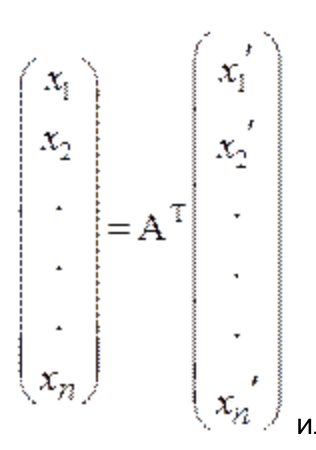